<a href="https://colab.research.google.com/github/kimjihye058/PyCon-Korea-2024/blob/main/Maplotlib_DataPi_AnomalyDetection_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.data.csv 온도 데이터에서 이상을 탐지하는 코드

In [ ]:
import pandas as pd

# CSV 파일 경로
csv_file = "./data.csv"

# CSV 파일을 DataFrame으로 읽어오기
data = pd.read_csv(csv_file, names=['Datetime', 'Temperature', 'Voltage'])

# 온도 데이터만 추출
temperatures = data[['Temperature']]


#2. Z-score를 사용하여 이상을 탐지하기 위한 기준을 설정

In [ ]:
from scipy.stats import zscore

# Z-score를 계산하여 이상을 탐지하는 기준 설정
z_scores = zscore(temperatures)
threshold = 3  # 이상을 탐지하는 기준 값 (임의로 설정)
anomalies = temperatures[(z_scores > threshold) | (z_scores < -threshold)]


#3. 이상 탐지 결과를 시각화하여 이상을 확인

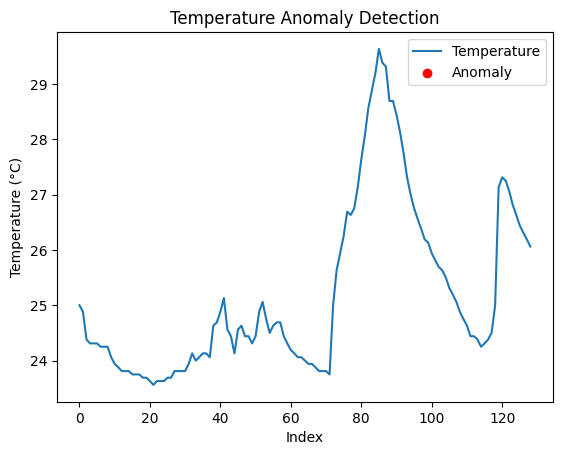

In [ ]:
import matplotlib.pyplot as plt

# 전체 온도 데이터 시각화
plt.plot(temperatures.index, temperatures['Temperature'], label='Temperature')

# 이상 탐지 결과 시각화
plt.scatter(anomalies.index, anomalies['Temperature'], color='red', label='Anomaly')

plt.xlabel('Index')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Anomaly Detection')
plt.legend()
plt.show()
